In [41]:

#importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In this short project I am going to explore my data, clean it from missing values, change some data types and rename columns if needed and build a couple of visualizations to take a look at ROMI and total spend values distribution between different advertising campaigns and correlation between numeric values in this data set.

Part 1
Exploration of data and cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB
None
ad_date               0
campaign_name         0
total_spend           0
total_impressions     0
total_clicks          0
total_value           0
cpc                  51
cpm                  32
ctr                  32
romi                 32
dtype: i

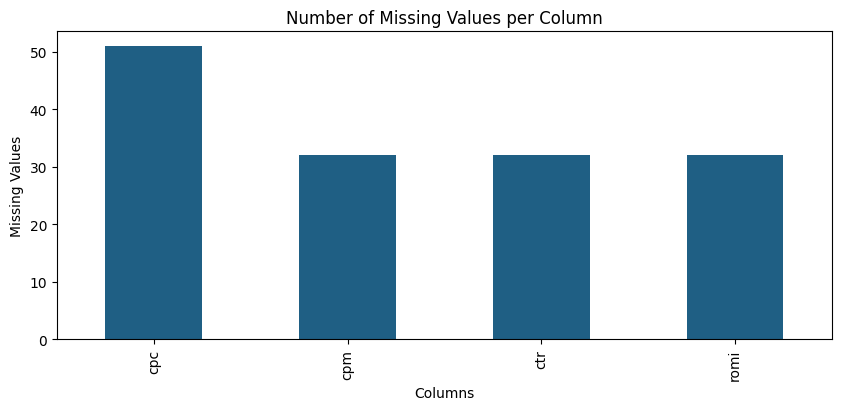

In [42]:
#loading data, checking main information and Null-values 
fb_ads = pd.read_csv("C:/Users/PC/Desktop/Portfolio/data sets/facebook_ads/facebook_ads_data (2.0).csv")
print(fb_ads.info())
fb_ads.shape
print(fb_ads.isnull().sum())
# Total missing values per column
missing_values = fb_ads.isnull().sum()

# Plot missing values as bar chart
plt.figure(figsize=(10, 4))
missing_values[missing_values > 0].sort_values(ascending=False).plot(kind='bar', color='#1F5F84')
plt.title('Number of Missing Values per Column')
plt.ylabel('Missing Values')
plt.xlabel('Columns')
plt.show()

In [ ]:
# as we do not have too many missing values I will replace them with mean for each column
fb_ads['cpc'].fillna(fb_ads['cpc'].mean(), inplace=True)
fb_ads['cpm'].fillna(fb_ads['cpm'].mean(), inplace=True)
fb_ads['ctr'].fillna(fb_ads['ctr'].mean(), inplace=True)
fb_ads['romi'].fillna(fb_ads['romi'].mean(), inplace=True)
print(fb_ads.isnull().sum())


In [44]:
#I would like to rename some columns
new_names = { 'cpc':' cost_per_click',
             'cpm': 'cost_per_mille',
             'ctr':'cost_through_rate',
             'romi':'romi'}
fb_ads.rename(columns=new_names, inplace=True)



In [45]:
#changing data type of the ad_date from object to datetime in order to 
# make data manipulation easier 
fb_ads['ad_date'] = pd.to_datetime(fb_ads['ad_date'], format='%Y-%m-%d')
print(fb_ads.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   object        
 2   total_spend        1494 non-null   float64       
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   float64       
 6    cost_per_click    1494 non-null   float64       
 7   cost_per_mille     1494 non-null   float64       
 8   cost_through_rate  1494 non-null   float64       
 9   romi               1494 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 116.8+ KB
None


(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

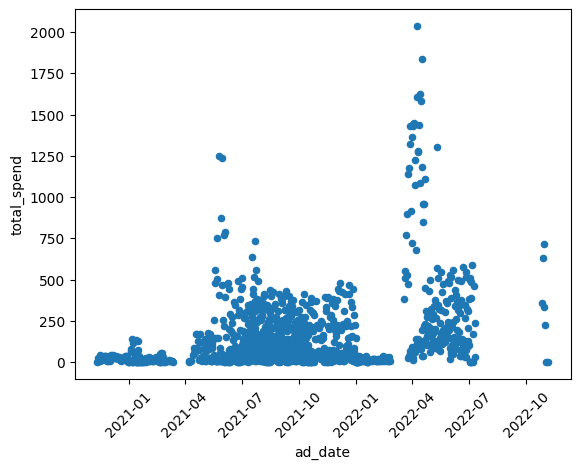

In [46]:
#exploring statistics of main columns
fb_ads[['total_spend','total_impressions',
       'total_clicks','total_value']].describe()
#mean and median have a huge gap, so extreme values better to be excluded to ensure better analysis
#looking at the data distribution
fb_ads.plot(x ='ad_date', y = 'total_spend', kind = 'scatter')
plt.xticks(rotation = 45)

(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

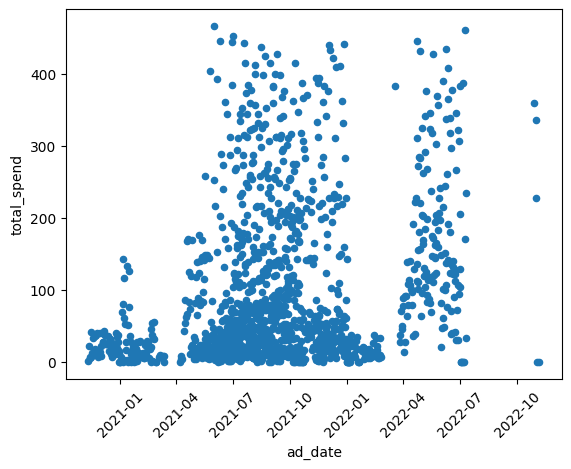

In [47]:
#getting rid of outliers and demonstrating new distribution
quantile_95 = fb_ads['total_spend'].quantile(.95)
fb_ads=fb_ads[fb_ads['total_spend']<= quantile_95]
fb_ads.plot( x = 'ad_date', y = 'total_spend', kind= 'scatter')
plt.xticks(rotation = 45)

Part 2
Data Visulization

C:\Users\PC\AppData\Local\Temp\ipykernel_4572\2418301849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_ads['day_of_week'] = fb_ads['ad_date'].dt.dayofweek  # 0=Monday, 1=Tuesday, ..., 6=Sunday


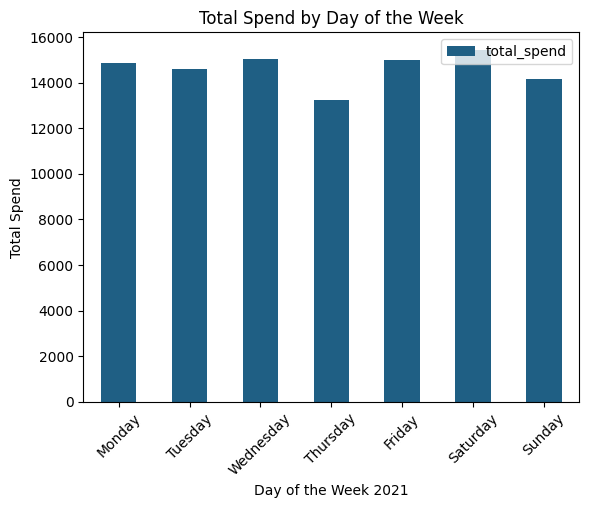

In [48]:
##building a chart that represents total spend on advertising for every day week for the year 2021
fb_ads['day_of_week'] = fb_ads['ad_date'].dt.dayofweek  # 0=Monday, 1=Tuesday, ..., 6=Sunday
fb_ads_2021 = fb_ads[fb_ads['ad_date'].dt.year == 2021]
# Grouping by the day of the week and sum 'total_spend'
grouped_data = fb_ads_2021.groupby('day_of_week', as_index=False).agg({'total_spend': 'sum'})

day_mapping = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}
grouped_data['day_of_week'] = grouped_data['day_of_week'].map(day_mapping)

# Ploting the data as a bar chart
grouped_data.plot(x='day_of_week', y='total_spend', kind='bar', color='#1F5F84')
plt.xlabel('Day of the Week 2021')
plt.ylabel('Total Spend')
plt.title('Total Spend by Day of the Week')
plt.xticks(rotation=45)
plt.show()

As we can see in this chart the highest total spend amount was made on Saturday,Wednesday and Friday.

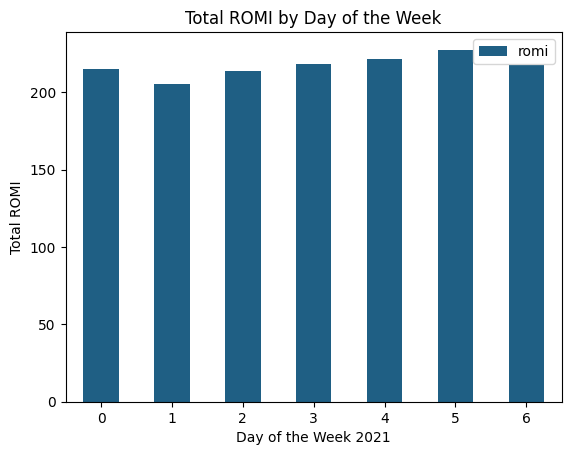

In [49]:
grouped_data = fb_ads_2021.groupby('day_of_week', as_index=False).agg({'romi': 'sum'})
grouped_data.plot(x='day_of_week', y='romi', kind='bar', color='#1F5F84')
# Customizing the plot
plt.xlabel('Day of the Week 2021')
plt.ylabel('Total ROMI')
plt.title('Total ROMI by Day of the Week')
plt.xticks(rotation=0)
plt.show()

And the highest ROMI can be observed on Friday, Saturday and Sunday

C:\Users\PC\AppData\Local\Temp\ipykernel_4572\3686877575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_ads_2021['rolling_spend']= fb_ads_2021['total_spend'].rolling(window = 7).mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_4572\3686877575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_ads_2021['rolling_romi']=fb_ads_2021['romi'].rolling(window=7).mean()


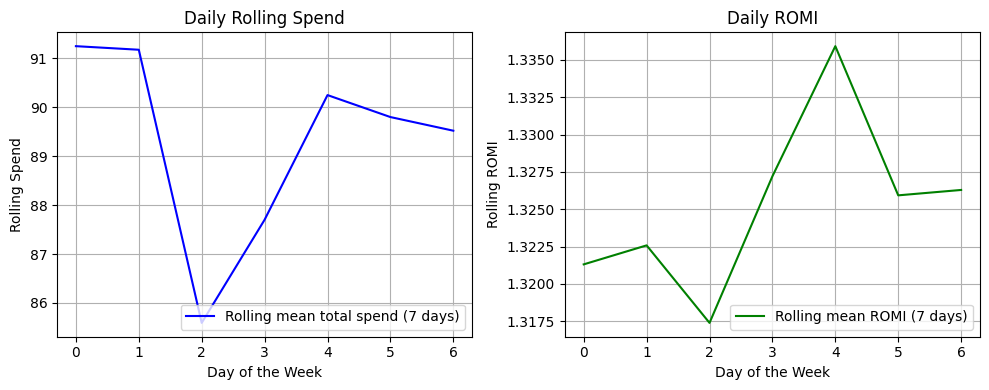

In [50]:
#Calculating rolling mean of  total spend and  ROMI 
fb_ads_2021['rolling_spend']= fb_ads_2021['total_spend'].rolling(window = 7).mean()
fb_ads_2021['rolling_romi']=fb_ads_2021['romi'].rolling(window=7).mean()
daily_data = fb_ads_2021.groupby('day_of_week').agg({'total_spend': 'sum', 'romi': 'mean', 
                                                  'rolling_spend': 'mean', 'rolling_romi': 'mean'}).reset_index()
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
# Plot rolling spend on the first axis
ax[0].plot(daily_data['day_of_week'], daily_data['rolling_spend'], label='Rolling mean total spend (7 days)', color='blue')
ax[0].set_title('Daily Rolling Spend')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Rolling Spend')
ax[0].tick_params(axis='x', rotation=0)
ax[0].legend(loc = 'lower right')
ax[0].grid()

# Plot rolling ROMI on the second axis
ax[1].plot(daily_data['day_of_week'], daily_data['rolling_romi'], label='Rolling mean ROMI (7 days)', color='green')
ax[1].set_title('Daily ROMI')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Rolling ROMI')
ax[1].tick_params(axis='x', rotation=0)
ax[1].legend(loc = 'lower right')
ax[1].grid()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Here it would be interesting to know why we spend so much less on Wednesday then on other days...
And why Friday is the day with the highest ROMI and not weekends or Monday( the day on which we spend the most)

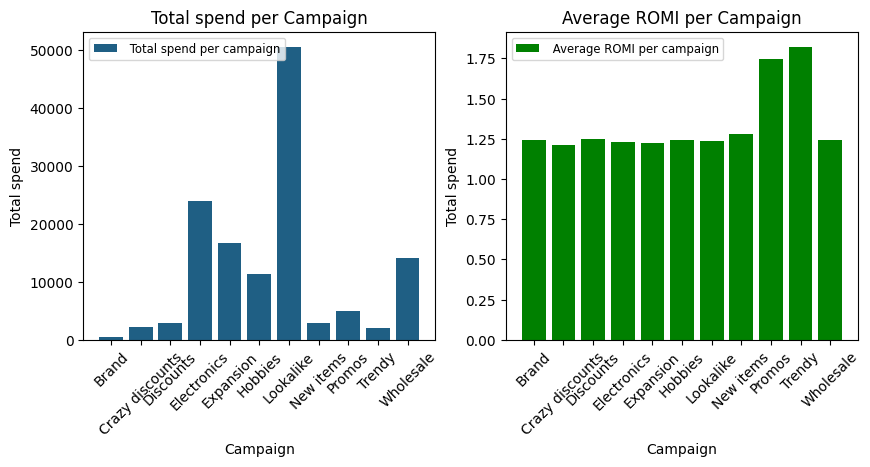

In [51]:
#Graph of the total amount of advertising costs and average ROMI  in each of the campaigns
fb_ads_1 = fb_ads.groupby('campaign_name', as_index = False).agg({'total_spend':'sum'})
fb_ads_2 = fb_ads.groupby('campaign_name', as_index = False).agg({'romi':'mean'})

fig,ax = plt.subplots(ncols = 2, figsize = (10,4))
ax[0].bar(fb_ads_1['campaign_name'],fb_ads_1['total_spend'], label = ' Total spend per campaign', color = '#1F5F84')
ax[0].set_title('Total spend per Campaign')
ax[0].set_xlabel('Campaign')
ax[0].set_ylabel('Total spend')
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend(loc = 'upper left', fontsize = 'small')

ax[1].bar(fb_ads_1['campaign_name'],fb_ads_2['romi'], label = ' Average ROMI per campaign', color = 'green')
ax[1].set_title('Average ROMI per Campaign')
ax[1].set_xlabel('Campaign')
ax[1].set_ylabel('Total spend')
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend(loc = 'upper left', fontsize = 'small')



Here we can see that our investing in campaigns like 'Hobbies', 'Crazy discounts' and 'Wholesale' was not economically optimal because these were not the campaigns that brought us the highest return on investment.
Instead we can clearly see that 'Trendy' and 'New Items Promos' were the most profitable ones, so it would be strategically great to spend more money on them.

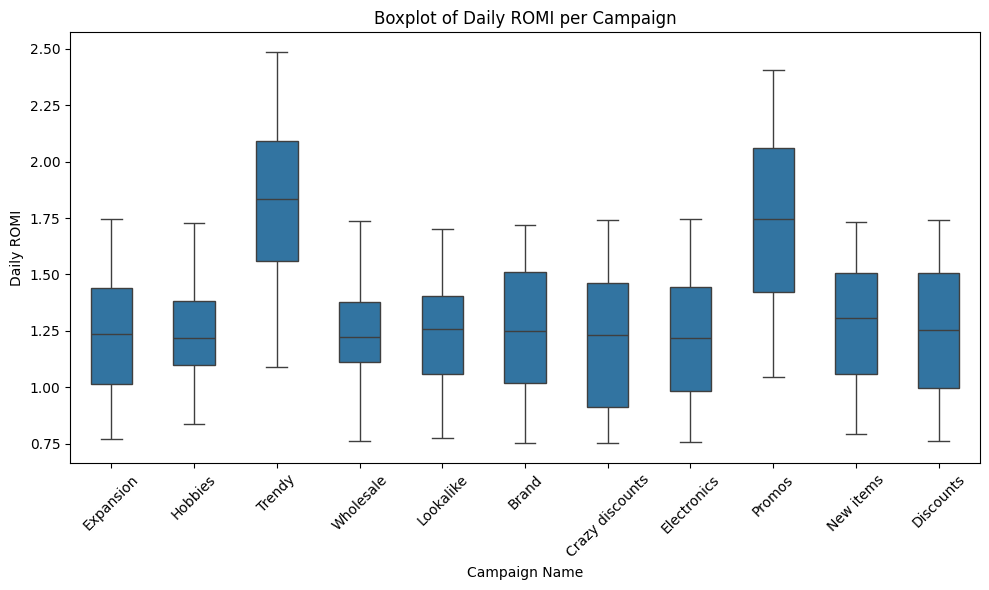

In [52]:
#building boxplot for ROMI per each campaign
plt.figure(figsize=(10, 6))  
sns.boxplot(x='campaign_name', y='romi', data=fb_ads, width=0.5)
plt.title('Boxplot of Daily ROMI per Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Daily ROMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


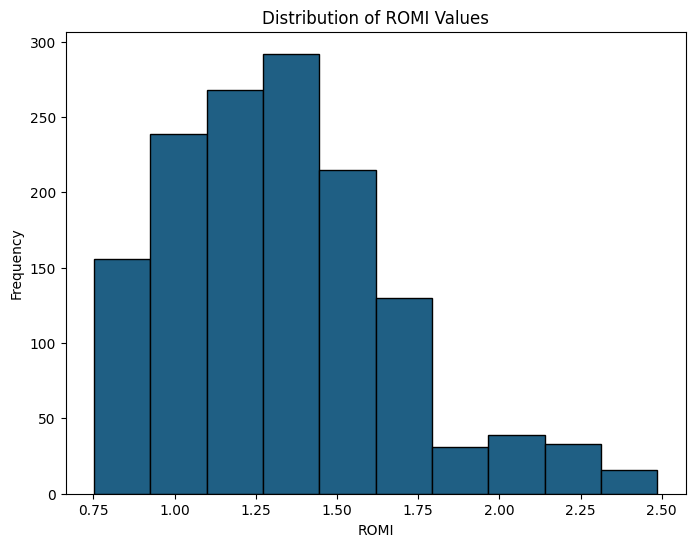

In [53]:
#Build a histogram with the distribution of ROMI values 
plt.figure(figsize=(8, 6))
plt.hist(fb_ads['romi'], bins=10, color='#1F5F84', edgecolor='black')

# Add title and labels
plt.title('Distribution of ROMI Values')
plt.xlabel('ROMI')
plt.ylabel('Frequency')

# Display the plot
plt.show()

We can state that our ROMI is mostly between 1 and 1.5 which is in  general a good result, we have beaten the break-even point, our marketing campaigns are profitable but there is still space to growth

Text(0.5, 1.0, 'Heatmap of Correlation Between Numerical Columns')

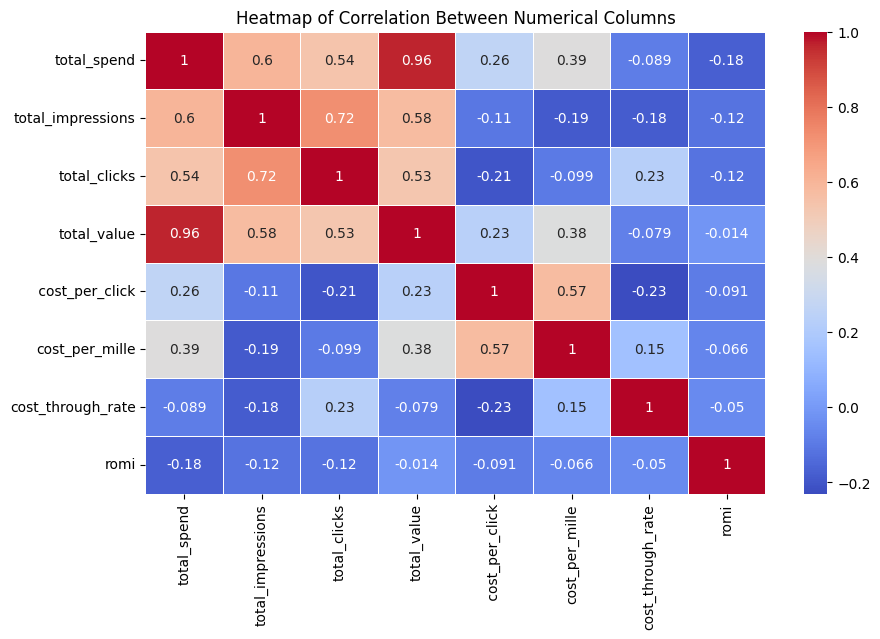

In [54]:
# Select only numerical columns
numerical_df = fb_ads.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))  # Set figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title to the heatmap
plt.title('Heatmap of Correlation Between Numerical Columns')

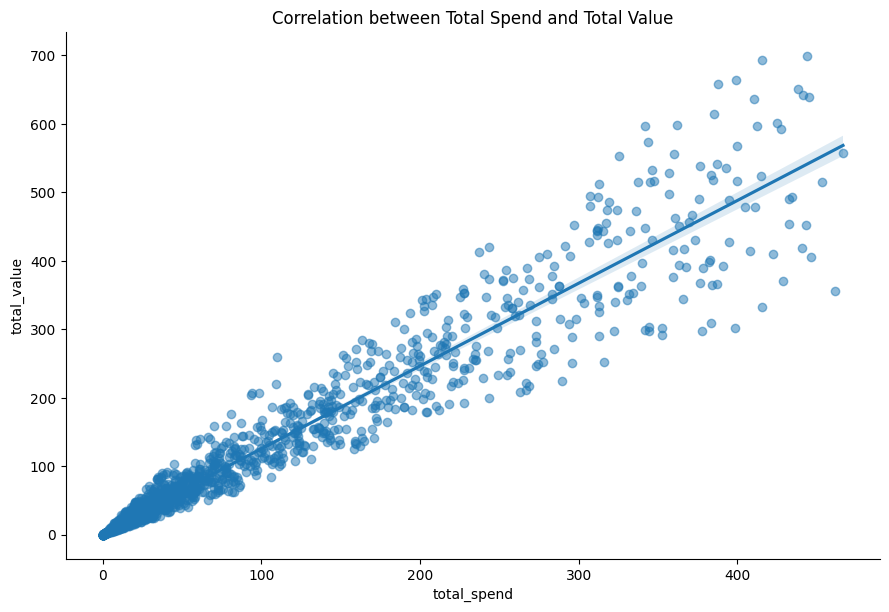

In [55]:
#Build a scatter plot with linear regression  to visualize the relationship between these quantities.
sns.lmplot(x='total_spend', y='total_value', data=fb_ads, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Correlation between Total Spend and Total Value')
plt.show()


Conclusion:

We can observe that the coefficient of regression between total value and total spend is 0.96, which statistically indicates a very strong positive relationship. This suggests that as spending increases, total value (revenue) also increases proportionally, which is a good indicator of the effectiveness of our campaigns.

However, external factors should not be overlooked. For example, the day of the week on which the campaign is held plays an important role. As we have observed, Friday tends to generate the highest ROMI (Return on Marketing Investment), which implies that consumer behavior may vary depending on the day, potentially due to paydays, shopping habits, or other external conditions.

Additionally, the most successful campaigns have been 'Trendy' and 'New Items Promos'. Given their higher performance, these campaigns warrant more investment. By increasing spending on these campaigns and further optimizing their strategies, we can likely achieve even greater returns.

Overall, our marketing efforts are yielding profitable ROMI. The strong correlation between spending and revenue, combined with insights into external factors and successful campaigns, suggests that our marketing strategy is on the right track. However, further adjustments and fine-tuning could lead to even better results.  

In [57]:
fb_ads.to_excel('facebook_final_df.xlsx')